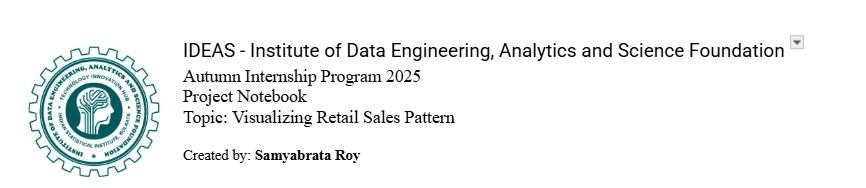

# Note Book-2
#Assisgment: Time Series DataSet Retail Seris Data of a Book-Shop

# Bookshop Sells From Main Branch to Sub Braches of Mega City Entire INDIA (January,2023- September,2025)

# 📖 Introduction

Every time we walk into Book Store or shop online, we leave behind a trail of data — what types of book wd bought, when we bought it through online or offline, how much we paid, how the transaction method and even how often we came back or any pronlem t
how the return policy or if fully refund . At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, Order ID, Customer ID & ISBN(Book ID).

But when we start to visualize this data, patterns emerge. We can see which Books sells the most during year, how customer behavior changes across season(Academic Year), and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

Here, for visualing the data set according to Tusk of our Internship Mentor , I have take a Retail book Shop Data Set (January,2023-September,2025). To visualize the Data set I use Python as a programming Language.

This project focuses on the analysis of bookshop sales data consisting of 2000 records, which include information such as book titles, categories, transaction details, quantities sold, and revenue generated.

###By examining this dataset, the project aims to:

1.Understand sales distribution across different book categories.

2.Identify revenue-driving products and categories contributing most to overall sales.

3.Analyze customer purchase behavior through time-series sales patterns.

4.Visualize key insights using graphs such as bar charts, line charts, and cumulative revenue trends.




---

## 📝 Before We Dive In...



Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   Time series data means data collected over time, at regular or irregular intervals, with time as one of the key variables.
   
   Likes,
   
   Daily stock prices of a company
   
   Hourly temperature readings
   
   Monthly sales revenue of a shop
   
   Yearly population growth

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
     Yes I agree it. I think to analysis any data python as programe language is best choice and it is little easy for me because of in this internship programe we learn 'Basic Python(Data,Variables,Lists,Loop,Class,Foundation,OOPS,Numpy,Pandas).To run and analysis this given data set we have to use Pandas and Matplotlib.pyplot.
     

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the BOOK-SHOP data set of Mega City Of INDIA  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

path = f"/content/retail_bookshop_sales_2000_books.csv"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(path)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   OrderID        OrderDate CustomerID BookID                BookName  \
0  O100001  8/18/2023 23:40      C2124  B1102   Broken Dreams - Vol 3   
1  O100002   7/24/2023 0:44      C3496  B1071         Golden Promises   
2  O100003  11/16/2024 4:09      C4571  B1082  Golden Empire - Vol 10   
3  O100004  6/21/2023 22:03      C2876  B1116     Bright Empire (117)   
4  O100005   8/15/2024 0:56      C6111  B1021             Broken Song   

           Author BookCategory  PriceINR  Quantity  TotalINR PaymentType  \
0    Ananya Verma      Fantasy   1218.43         1   1218.43        Cash   
1  Siddharth Khan      Romance    945.55         1    945.55        Card   
2    Ananya Verma    Self-Help    257.87         1    257.87  NetBanking   
3    Deepak Gupta      Fantasy    948.94         2   1897.88        Card   
4      Rhea Mehta  Non-Fiction    197.79         2    395.58  NetBanking   

  StoreLocation  
0       Kolkata  
1        Mumbai  
2       Chennai  
3       Chennai  
4          Pun



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

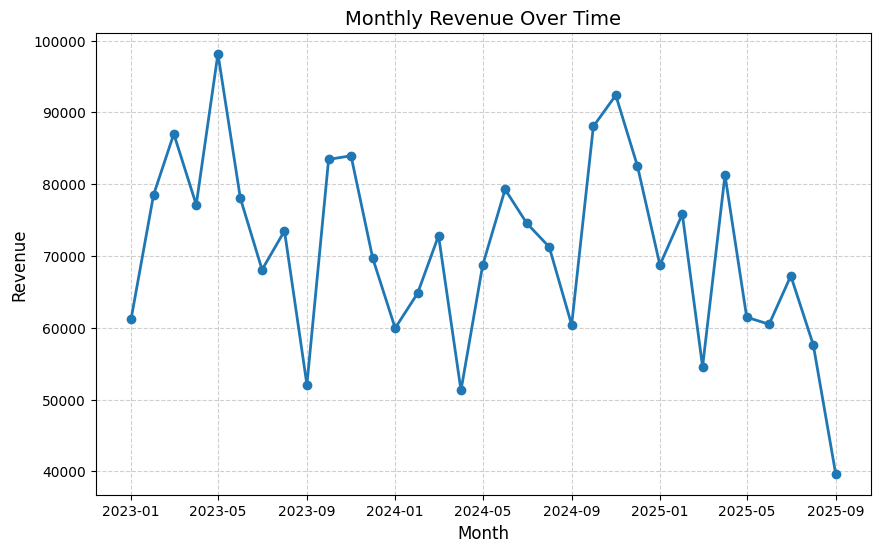

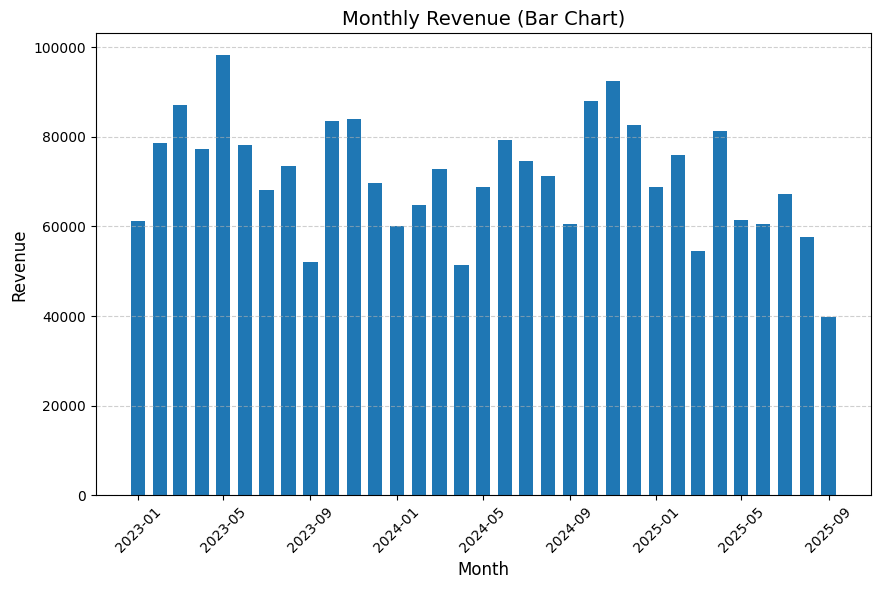

In [8]:
# Ensure OrderDate column is in datetime format
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['OrderDate'].dt.to_period('M'))['TotalINR'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


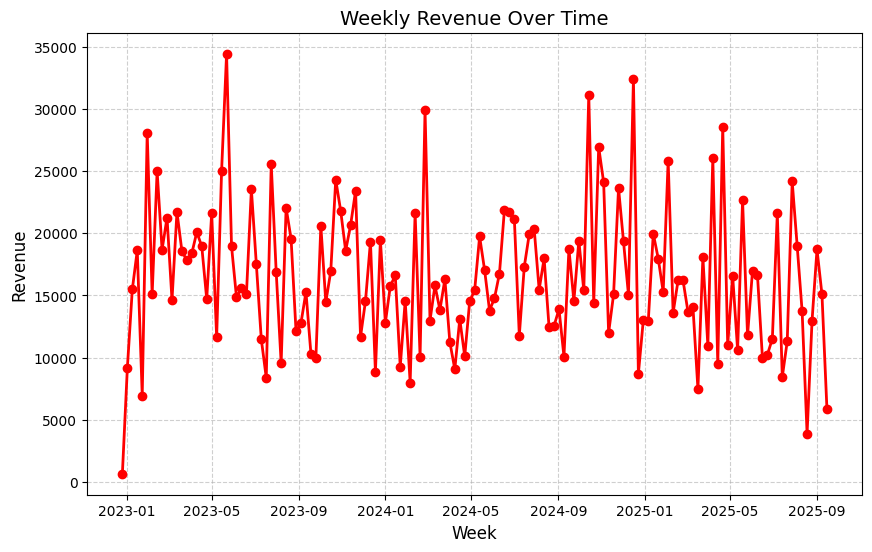

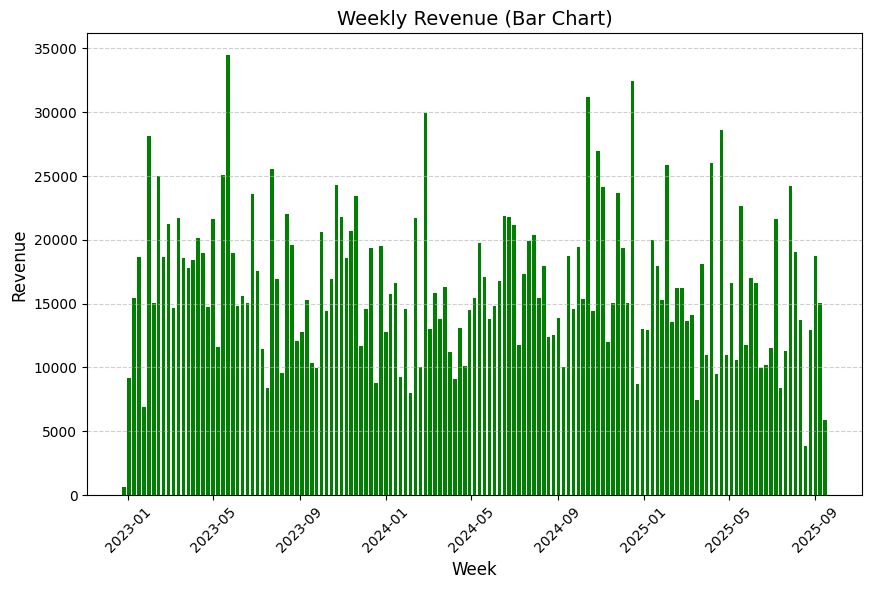

In [9]:
# Ensure Date column is in datetime format
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

# Group by Week-Year and calculate total revenue
weekly_revenue = df_sales.groupby(df_sales['OrderDate'].dt.to_period('W'))['TotalINR'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o',color='red', linewidth=2)
plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(weekly_revenue.index, weekly_revenue.values,color='green',width=5)  # width=5 for week spacing
plt.title("Weekly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 2

Now well try to visualize the overall sales over all the Book Categories, and infer about what Type of Book is best selling.

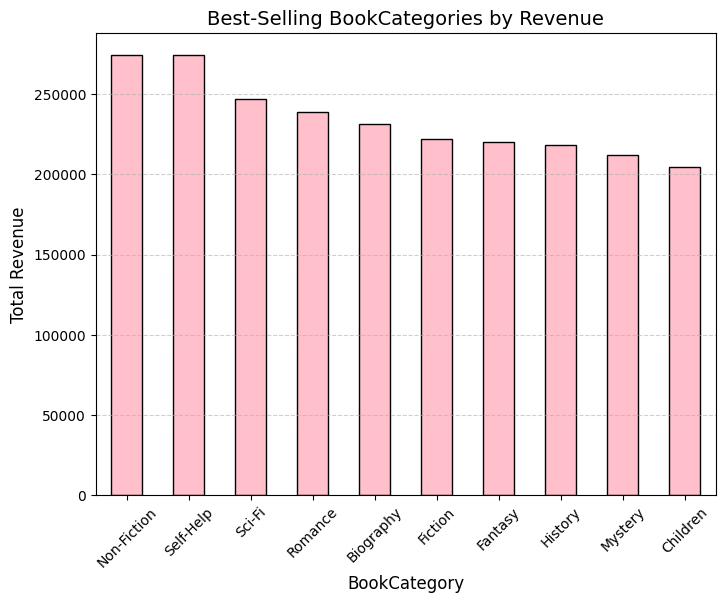

In [10]:
#Group by Book Category and sum the revenue
bookcategory_revenue= df_sales.groupby('BookCategory')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart

plt.figure(figsize=(8,6))
bookcategory_revenue.plot(kind='bar', color='pink', edgecolor='black')

plt.title("Best-Selling BookCategories by Revenue", fontsize=14)
plt.xlabel("BookCategory", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

Revenue contribution by category:
  BookCategory   TotalINR
6  Non-Fiction  274537.60
9    Self-Help  274209.62
8       Sci-Fi  246780.04
7      Romance  239192.58
0    Biography  231489.71
3      Fiction  222045.07
2      Fantasy  220398.59
4      History  218228.19
5      Mystery  211869.63
1     Children  204920.21


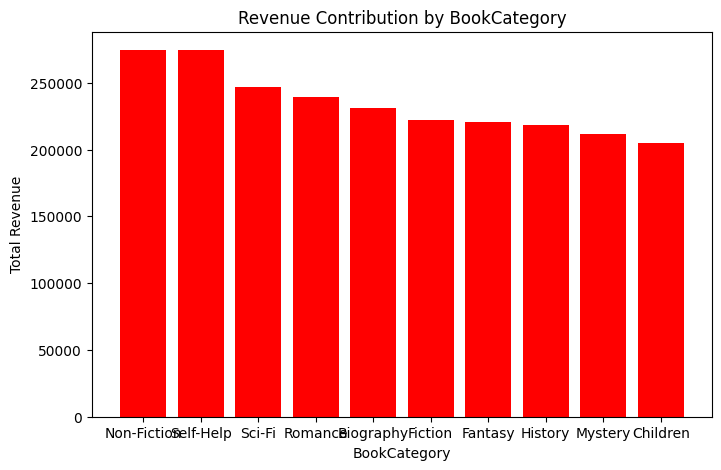

In [49]:
# Group by BookProduct Category and calculate total revenue
bookcategory_revenue = df_sales.groupby("BookCategory")["TotalINR"].sum().reset_index()

# Sort in descending order
bookcategory_revenue =bookcategory_revenue.sort_values(by="TotalINR", ascending=False)

# Display result
print("Revenue contribution by category:")
print(bookcategory_revenue)

# Plot a bar chart
plt.figure(figsize=(8, 5))
plt.bar(bookcategory_revenue["BookCategory"], bookcategory_revenue["TotalINR"],color="red")
plt.title("Revenue Contribution by BookCategory")
plt.xlabel("BookCategory")
plt.ylabel("Total Revenue")
plt.show()


Bar-Chart

Best-Selling Store Location According to Revenue

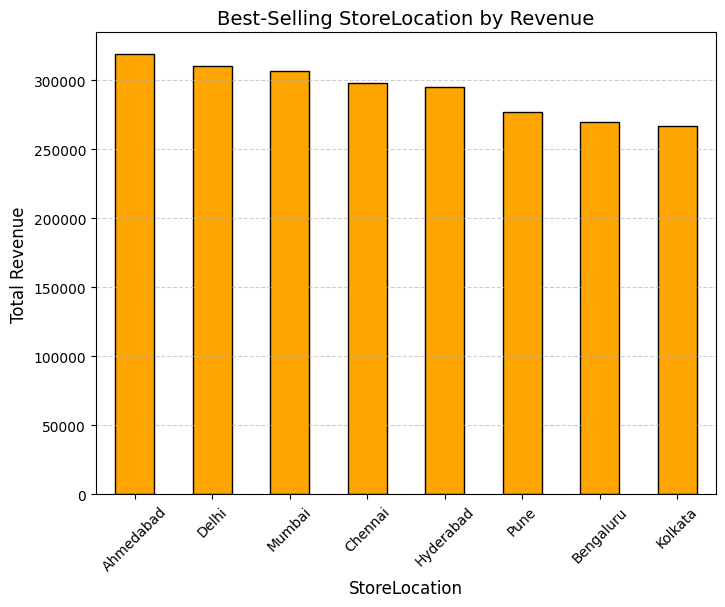

In [11]:
# Best-Selling Storelocation and sum the revenue
storelocation_revenue= df_sales.groupby('StoreLocation')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
storelocation_revenue.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Best-Selling StoreLocation by Revenue", fontsize=14)
plt.xlabel("StoreLocation", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Bar Chart

Transaction Process of Customer According to Revenue

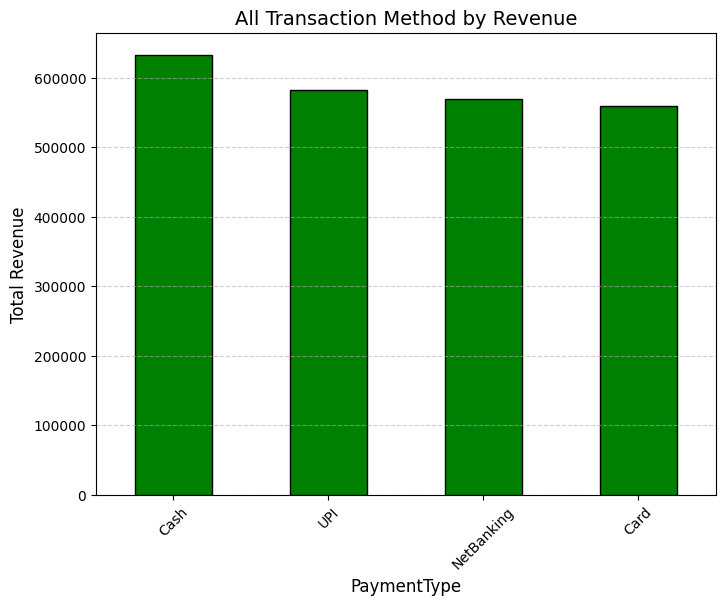

In [43]:
#Group by PaymentType and sum the revenue
paymenttype_revenue= df_sales.groupby('PaymentType')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
paymenttype_revenue.plot(kind='bar', color='green', edgecolor='black')

plt.title("All Transaction Method by Revenue", fontsize=14)
plt.xlabel("PaymentType", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Bar-Chart


Best-Selling Book Title by Accordind to Revenue

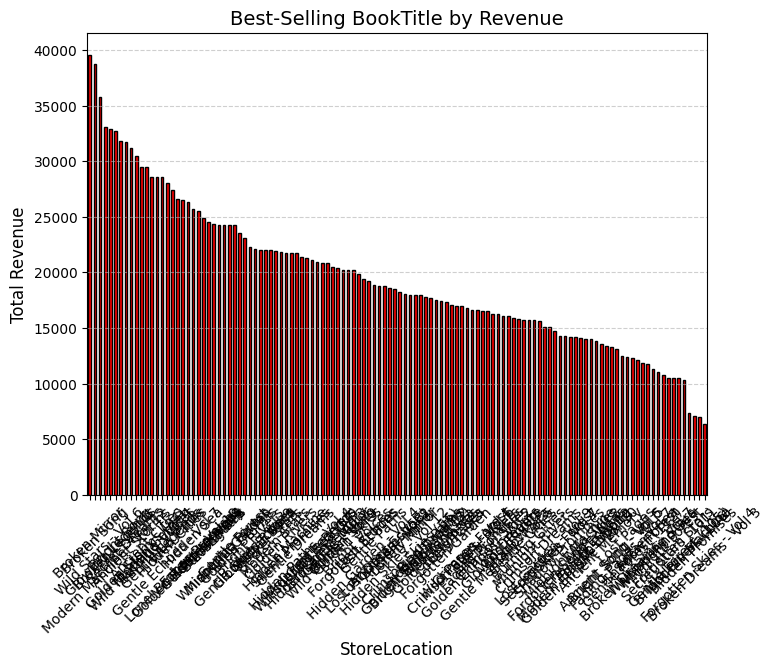

In [30]:
# Best-Selling BookTitle and sum the revenue
bookname_revenue= df_sales.groupby('BookName')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
bookname_revenue.plot(kind='bar', color='red', edgecolor='black')

plt.title("Best-Selling BookTitle by Revenue", fontsize=14)
plt.xlabel("StoreLocation", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Bar-Chart

Best-Selling Author's Book According to Revenue

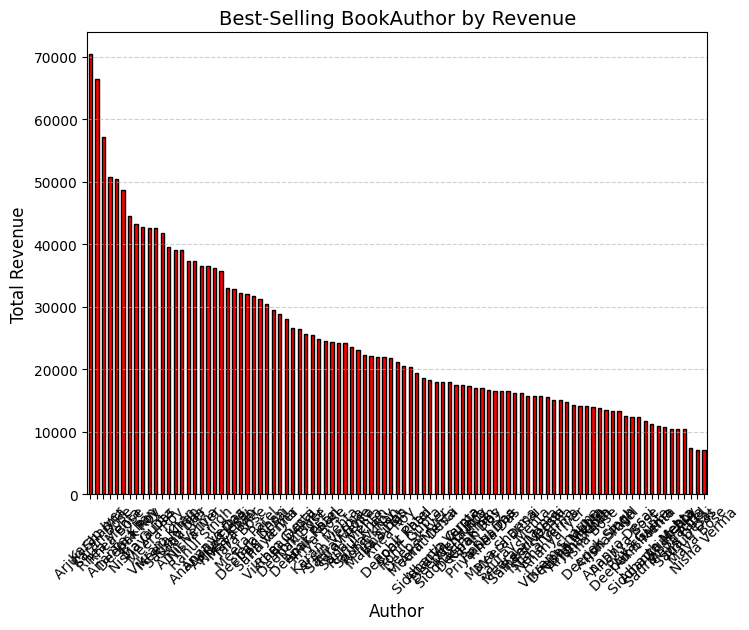

In [14]:
# Best-Selling BookAuthor and sum the revenue
author_revenue= df_sales.groupby('Author')['TotalINR'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
author_revenue.plot(kind='bar', color='red', edgecolor='black')

plt.title("Best-Selling BookAuthor by Revenue", fontsize=14)
plt.xlabel("Author", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

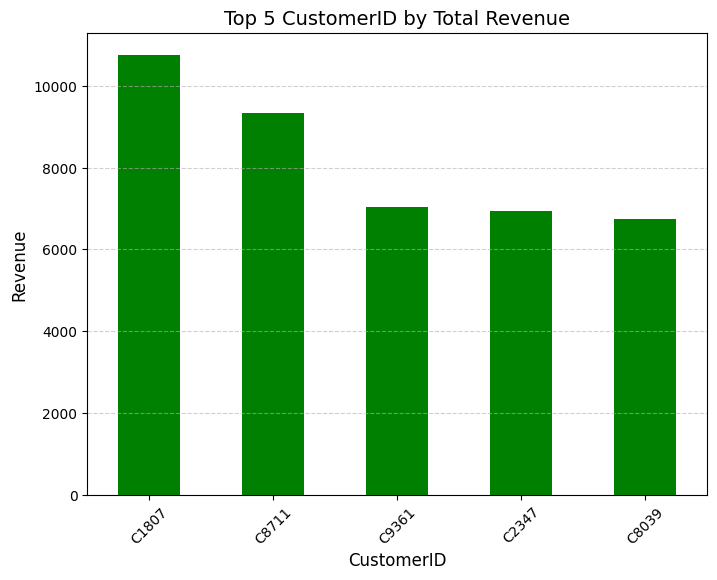

In [15]:
# Group by Top-5 customer and sum
top_customers = df_sales.groupby('CustomerID')['TotalINR'].sum().sort_values(ascending=False).head(5)


# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind="bar", color="green")
plt.title("Top 5 CustomerID by Total Revenue", fontsize=14)
plt.xlabel("CustomerID", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

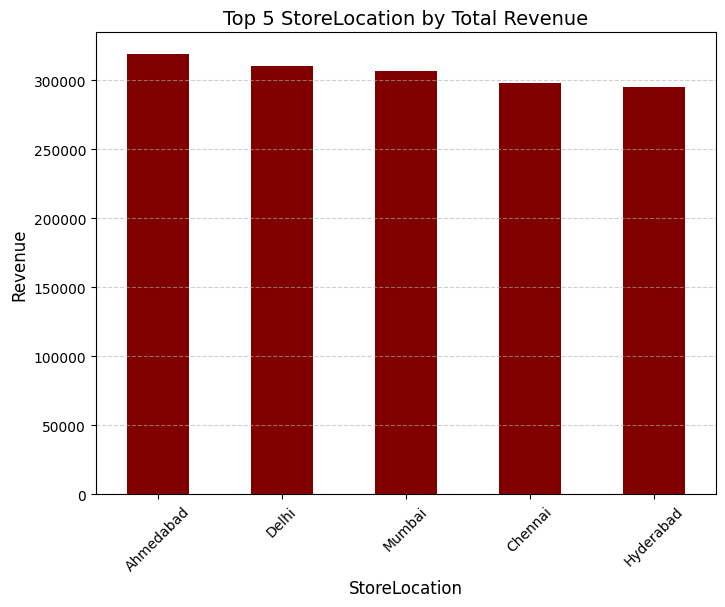

In [16]:
# Group by Top-5 selling Storelocation and sum
top_customers = df_sales.groupby('StoreLocation')['TotalINR'].sum().sort_values(ascending=False).head(5)


# ---- Bar Chart ----
plt.figure(figsize=(8,6))
top_customers.plot(kind="bar", color="maroon")
plt.title("Top 5 StoreLocation by Total Revenue", fontsize=14)
plt.xlabel("StoreLocation", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

/tmp/ipython-input-804425531.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_per_customers = df_sales.groupby('CustomerID').apply(lambda x:x['TotalINR'].sum()/len(x)).sort_values(ascending=False)


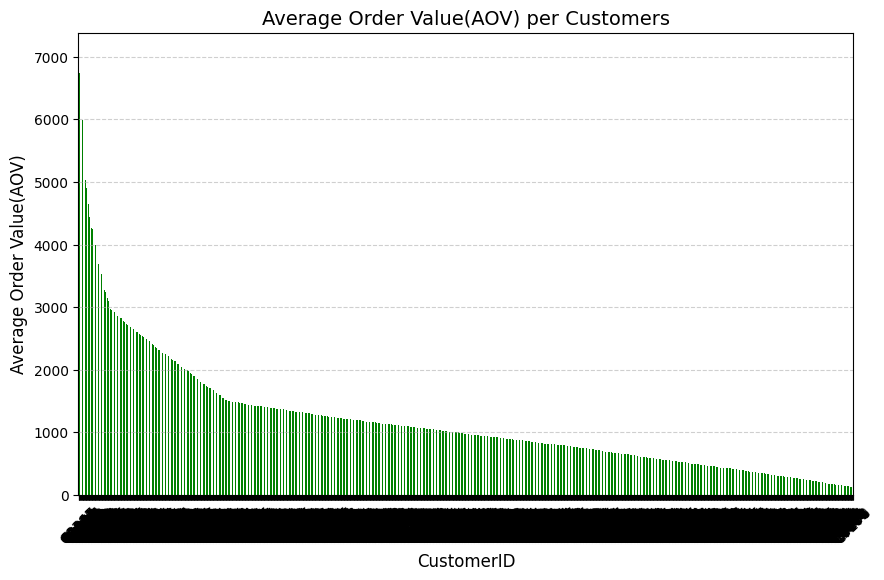

In [32]:
# Calculatind the average order value (AOV) per customer and plotting
aov_per_customers = df_sales.groupby('CustomerID').apply(lambda x:x['TotalINR'].sum()/len(x)).sort_values(ascending=False)


# ---- Plot ----
plt.figure(figsize=(10,6))
aov_per_customers.plot(kind="bar", color="green")
plt.title("Average Order Value(AOV) per Customers", fontsize=14)
plt.xlabel("CustomerID", fontsize=12)
plt.ylabel("Average Order Value(AOV)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()




---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

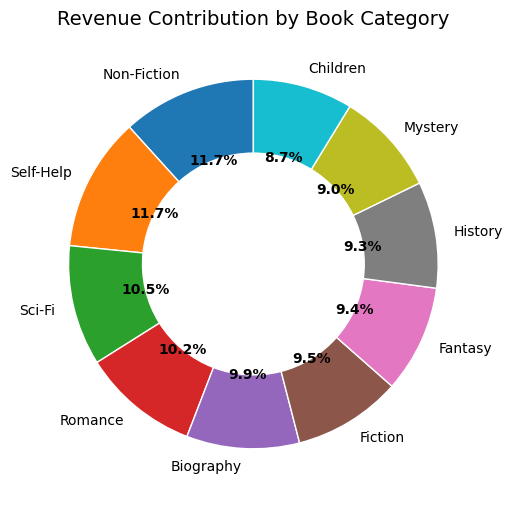

In [18]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    bookcategory_revenue,
    labels=bookcategory_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Book Category", fontsize=14)
plt.show()


Donut Chart

Revenue contribution By Store Location

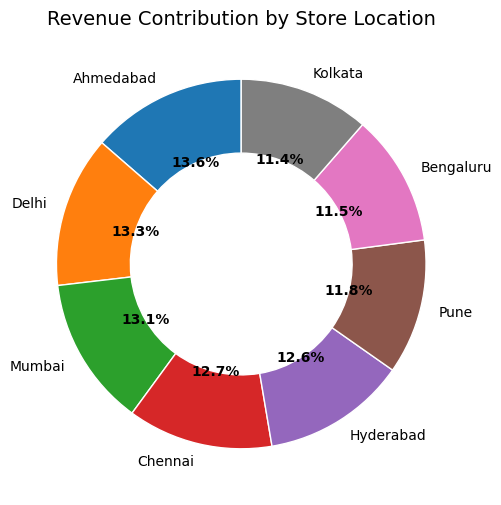

In [19]:
# Donut chart-Revenue Contribution By Store Location
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    storelocation_revenue,
    labels=storelocation_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Store Location", fontsize=14)
plt.show()

Donut Chart

Revenue contribution By Transaction Metheod

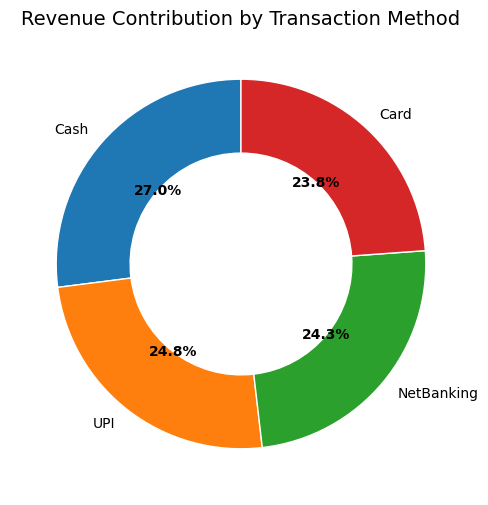

In [35]:
# Donut chart- Revenue Contribution by Transaction Method
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    paymenttype_revenue,
    labels=paymenttype_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Transaction Method", fontsize=14)
plt.show()


Donut Chart

Revenue contribution By Book Title

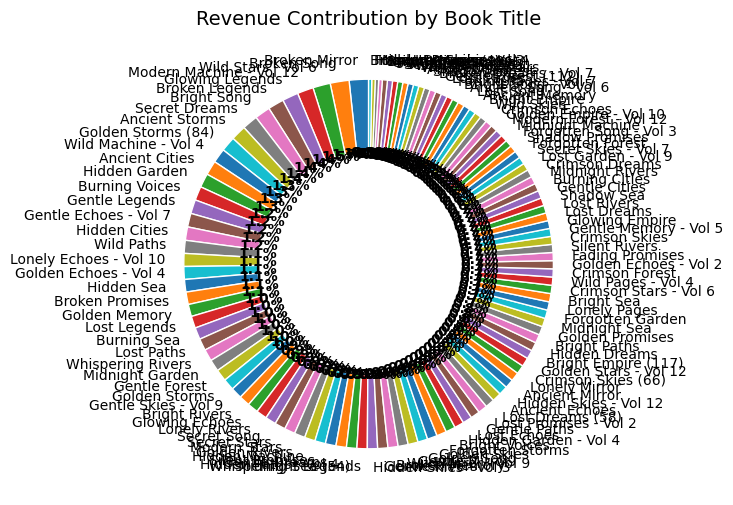

In [28]:
# Donut chart-Revenue Contribution By Title
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    bookname_revenue,
    labels=bookname_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Book Title", fontsize=14)
plt.show()


Donut Chart

Revenue contribution By Book's Author

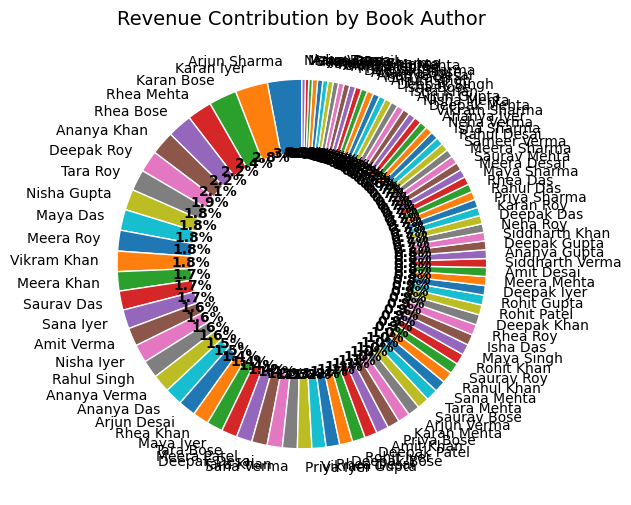

In [29]:
# Donut chart-revenue Contribution By Book Author
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    author_revenue,
    labels=author_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Book Author", fontsize=14)
plt.show()



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

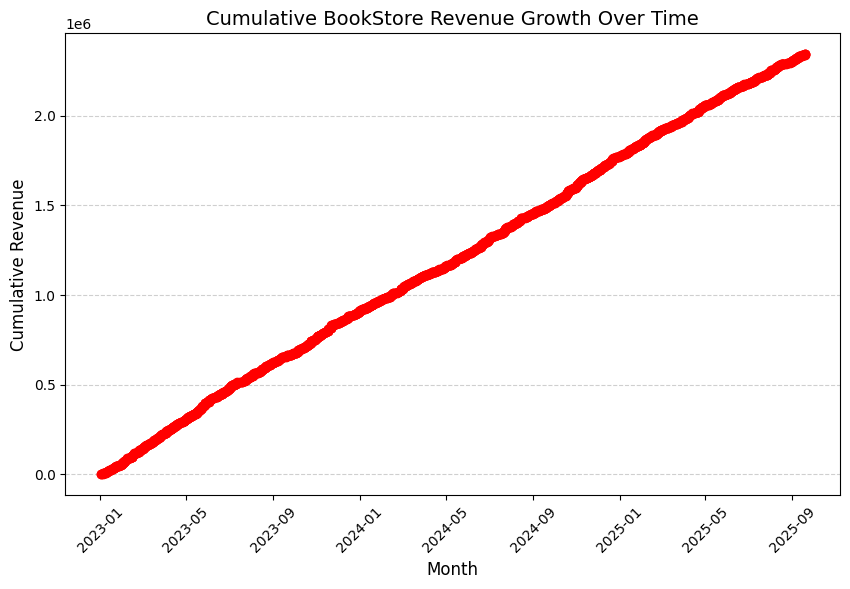

In [42]:
#Comulative Book Store Revenue Growth Over Time Graph
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])
df_sales = df_sales.sort_values('OrderDate').reset_index(drop=True)


df_sales['Cumulative Revenue'] = df_sales['TotalINR'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(df_sales['OrderDate'], df_sales['Cumulative Revenue'],color='red',marker='o', linewidth=2)
plt.title("Cumulative BookStore Revenue Growth Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()
